Download data from kaggle

In [ ]:
import os
import kagglehub
import pydicom
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("salikhussaini49/sunnybrook-cardiac-mri")

print("Path to dataset files:", path)


In [61]:
img_paths_list = []
for folder in folders_inside_main[1:]:
    
    imgs_path = os.listdir(folder)
    imgs_path = [os.path.join(folder, x) for x in imgs_path]

    imgs_path = [os.path.join(folder, x) for x in os.listdir(folder) if x.endswith(".dcm")]

    img_paths_list.extend(imgs_path)

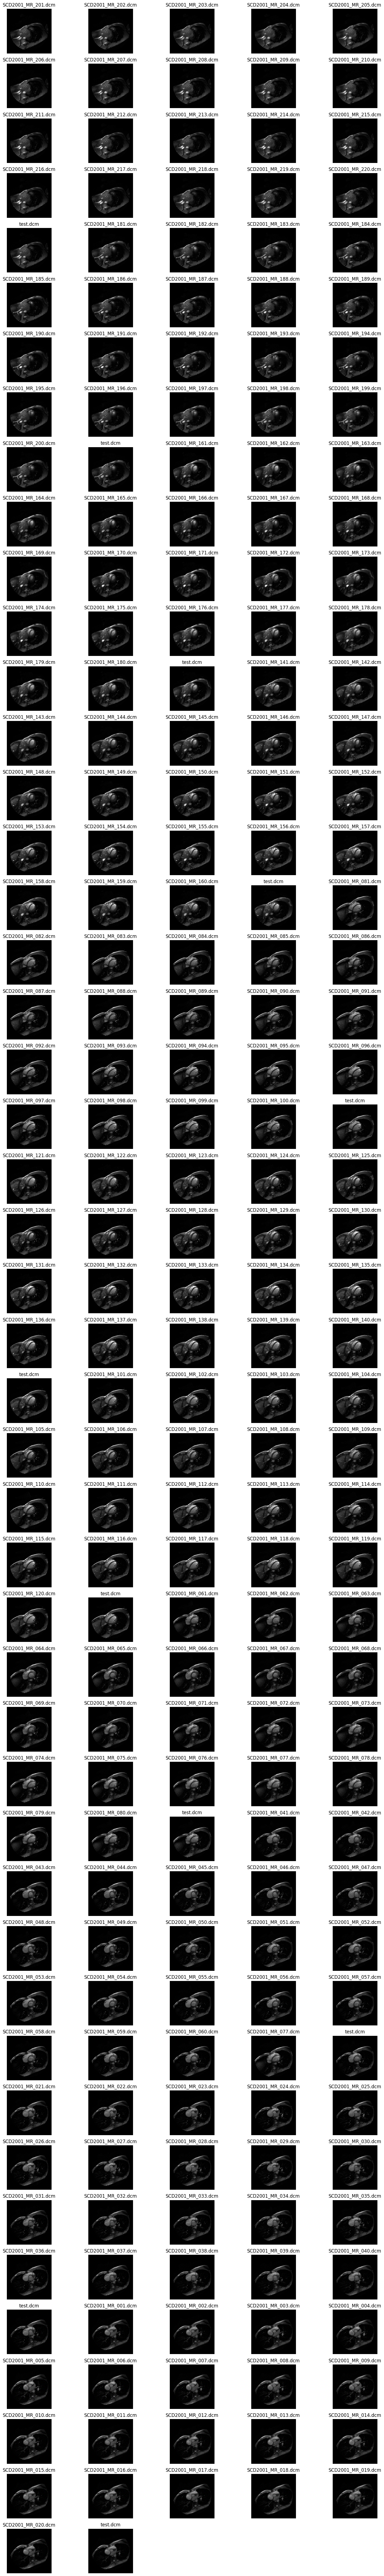

In [66]:
import pydicom
import matplotlib.pyplot as plt
import os

def display_dicom_images(img_paths_list, images_per_row=5):
    num_images = len(img_paths_list)
    num_rows = (num_images // images_per_row) + (1 if num_images % images_per_row else 0)

    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, num_rows * 2))
    axes = axes.flatten()  # Flatten the 2D array of subplots into 1D for easier indexing

    for idx, file in enumerate(img_paths_list):
        # Load the DICOM file
        dicom_data = pydicom.dcmread(file)
        image = dicom_data.pixel_array  # Extract pixel array

        # Display the DICOM image
        axes[idx].imshow(image, cmap="gray")
        axes[idx].axis("off")  # Hide axes
        axes[idx].set_title(f"{os.path.basename(file)}")

    # Hide unused subplots
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Example usage
display_dicom_images(img_paths_list)
